https://programmers.co.kr/learn/courses/30/lessons/17677

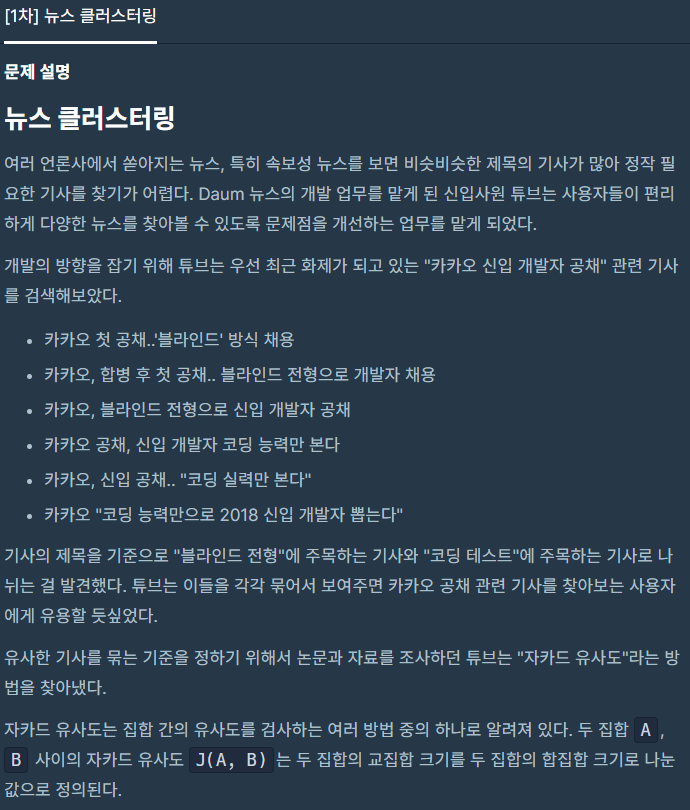
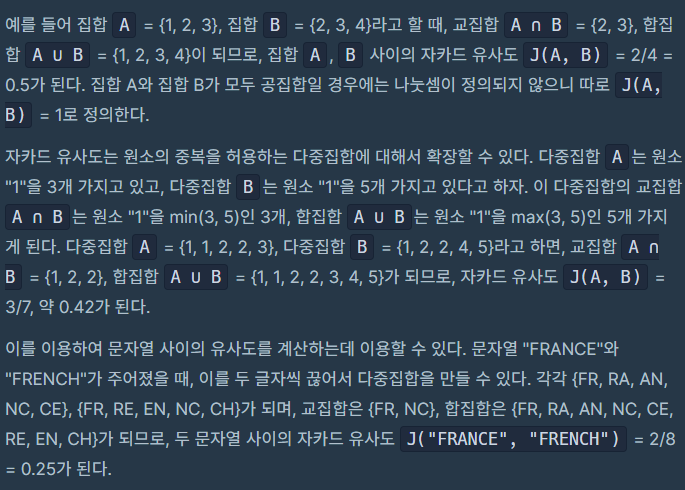
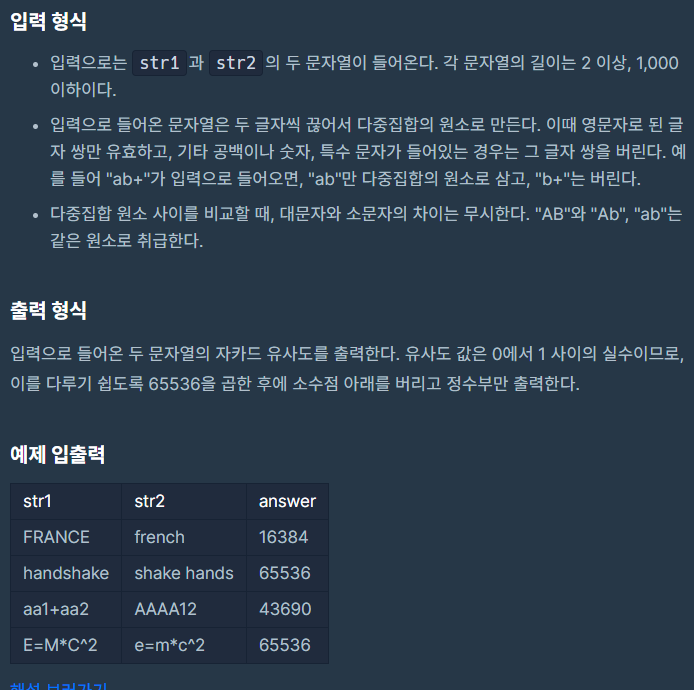

* 자카드 유사도
* 교집합/합집합
* 공집합일시 1을 return
* 다중집합 : 도 가능하며, 원칙은 같다. 

1. 두글자씩 끊어서 다중 집합으로 만든다.
2. 공백과 특수 문자가 포함된 원소는 버린다. 
3. 대소문자의 차이는 없는 것으로 간주한다.

In [ ]:
str1	str2	answer
FRANCE	french	16384
handshake	shake hands	65536
aa1+aa2	AAAA12	43690
E=M*C^2	e=m*c^2	65536

In [72]:
str1, str2 = 'aa1+aa2', 'AAAA12'

In [51]:
str1 = 'FRANCE'
str2 = 'french'

In [73]:
str1 = str1.upper()
str2 = str2.upper()

In [74]:
str1_l = []
for i,j in enumerate(str1[:-1]):
    a = str1[i:i+2]
    if a.isalnum():
        str1_l.append(str1[i:i+2])

str1_l
    

['AA', 'A1', 'AA', 'A2']

In [75]:
str2_l = []
for i,j in enumerate(str2[:-1]):
    a = str2[i:i+2]
    if a.isalnum():
        str2_l.append(str2[i:i+2])

str2_l
    

['AA', 'AA', 'AA', 'A1', '12']

In [76]:
cnt_inter=0
cnt_union=0
for i in str1_l:
    if i in str2_l:
        cnt_inter+=1
        cnt_union+=1
        str2_l.remove(i)
        
    else:
        cnt_union+=1

else:
    cnt_union+=len(str2_l)

print(cnt_inter, cnt_union)

3 6


In [56]:
(cnt_inter/ cnt_union)*65536

16384.0

In [89]:
def str_to_list(str):
    str_l = []
    str= str.upper()
    for i,j in enumerate(str[:-1]):
        a = str[i:i+2]
        if a.isalpha():
            str_l.append(str[i:i+2])
        
    return str_l


In [90]:
def solution(str1, str2):
    str1_l, str2_l = str_to_list(str1), str_to_list(str2)
    cnt_inter=0
    cnt_union=0
    for i in str1_l:
        if i in str2_l:
            cnt_inter+=1
            cnt_union+=1
            str2_l.remove(i)

        else:
            cnt_union+=1

    else:
        cnt_union+=len(str2_l)
        
    if cnt_union==0:
        return 65536
    
    return int((cnt_inter/ cnt_union)*65536)

    
    

In [92]:
str1, str2 = 'aa1+aa2', 'AAAA12'

In [77]:
str1, str2 = 'handshake','shake hands'

In [79]:
str1, str2 = 'E=M*C^2','e=m*c^2'

In [68]:
str1 = 'FRANCE'
str2 = 'french'

In [93]:
solution(str1, str2)

43690

정답 작성


In [ ]:
def str_to_list(str):
    str_l = []
    str= str.upper()
    for i,j in enumerate(str[:-1]):
        a = str[i:i+2]
        if a.isalpha():
            str_l.append(str[i:i+2])
        
    return str_l

def solution(str1, str2):
    str1_l, str2_l = str_to_list(str1), str_to_list(str2)
    
    cnt_inter=0
    cnt_union=0
    for i in str1_l:
        if i in str2_l:
            cnt_inter+=1
            cnt_union+=1
            str2_l.remove(i)

        else:
            cnt_union+=1

    else:
        cnt_union+=len(str2_l)
        
    if cnt_union==0:
        return 65536
    
    return int((cnt_inter/ cnt_union)*65536)


다른 좋은 정답

In [94]:
import re
import math

def solution(str1, str2):
    str1 = [str1[i:i+2].lower() for i in range(0, len(str1)-1) if not re.findall('[^a-zA-Z]+', str1[i:i+2])]
    str2 = [str2[i:i+2].lower() for i in range(0, len(str2)-1) if not re.findall('[^a-zA-Z]+', str2[i:i+2])]

    gyo = set(str1) & set(str2)
    hap = set(str1) | set(str2)

    if len(hap) == 0 :
        return 65536

    gyo_sum = sum([min(str1.count(gg), str2.count(gg)) for gg in gyo])
    hap_sum = sum([max(str1.count(hh), str2.count(hh)) for hh in hap])

    return math.floor((gyo_sum/hap_sum)*65536)
